## Results of Bootstraps

In [20]:
library(dplyr)
library(xtable)

In [21]:
setwd("/home/leoKraushaar/Documents/School/Year 3/Semester 2/STAT 413/Project/protests/")

In [22]:
resamp_results <- read.csv("data/results/resamp_boot_results.csv")[, -1]
param_results <- read.csv("data/results/param_boot_results.csv")[, -1]
smooth_results <- read.csv("data/results/smooth_boot_results.csv")[, -1]

## Confidence intervals

In [23]:
interval <- function(X, alpha=0.05) {
    quantiles <- quantile(X, probs = c(alpha/2, 1/2, 1-(alpha/2)))
    return(quantiles)
}

In [24]:
mean_and_sd <- function(X) {
    return(c(mean(X), sd(X)))
}

In [25]:
params <- rbind(resamp_results, param_results, smooth_results)
type <- factor(rep(c("R", "P", "S"), each=10000))

results <- data.frame(type, params)
head(results)

,type,X.Intercept.,monthSpring,monthSummer,monthWinter,provBritish.Columbia,provManitoba,provNew.Brunswick,provNewfoundland.and.Labrador,provNorthwest.Territories,provNova.Scotia,provNunavut,provOntario,provPrince.Edward.Island,provQuebec,provSaskatchewan,provYukon,retail
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,R,3.244585,0.006926766,-0.3788602,-0.1090520,0.9351093,-1.4236981,-2.010733,-2.692642,-4.857194,-2.057455,-4.393231,5.347779,-3.424353,2.204497,-2.086024,-3.830251,-1.6285986
2,R,3.260520,-0.138461074,-0.6429856,-0.2252399,0.6844205,-1.0172718,-1.743031,-2.039554,-3.623698,-1.370148,-3.518458,2.581892,-2.672919,1.082253,-1.578037,-2.582025,-0.6158624
3,R,4.766945,-0.147152623,-0.7518559,-0.2362456,1.0398042,-3.6080141,-4.505630,-5.352689,-8.452046,-4.269014,-7.468835,10.213959,-6.745724,4.006996,-4.381412,-6.603586,-3.9573799
4,R,3.709305,-0.118238225,-0.6555250,-0.3405262,0.7107021,-1.9523412,-2.606208,-2.614093,-5.208495,-2.246478,-5.088186,4.984171,-4.053228,1.886935,-2.532551,-4.084611,-1.6218533
5,R,3.552543,-0.197672329,-0.6612784,-0.1292685,0.9047185,-1.4811943,-2.291576,-2.839374,-5.344607,-2.297504,-4.459139,5.180023,-3.905299,2.041238,-2.388822,-4.085783,-1.6598213
6,R,3.012924,-0.121514940,-0.6325036,-0.1695788,0.8867711,-0.8422924,-1.191386,-1.660419,-3.773542,-1.144260,-3.015406,3.125995,-2.598399,1.275465,-1.307033,-2.677303,-0.7107480


In [26]:
month_indices <- grepl("month", colnames(results))
month_labels <- colnames(results)[month_indices]
month_labels <- sapply(month_labels, function(x) substr(x, 6, 8))

prov_indices <- grepl("prov", colnames(results))
prov_labels <- colnames(results)[prov_indices]
matches <- gregexpr("[A-Z]", prov_labels)
capital_letters <- regmatches(prov_labels, matches)
combined_letters <- sapply(capital_letters, function(x) paste(x, collapse = ""))

In [27]:
new_names <- colnames(results)[c(1, 2, 3:ncol(results))]

new_names[month_indices] <- month_labels
new_names[prov_indices] <- combined_letters
new_names[2] <- "intercept"

colnames(results) <- new_names

In [28]:
split_data <- split(results, type)

## Resampling Results

In [29]:
R_data <- split_data$R
head(R_data)

,type,intercept,Spr,Sum,Win,BC,M,NB,NL,NT,NS,N,O,PEI,Q,S,Y,retail
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,R,3.244585,0.006926766,-0.3788602,-0.1090520,0.9351093,-1.4236981,-2.010733,-2.692642,-4.857194,-2.057455,-4.393231,5.347779,-3.424353,2.204497,-2.086024,-3.830251,-1.6285986
2,R,3.260520,-0.138461074,-0.6429856,-0.2252399,0.6844205,-1.0172718,-1.743031,-2.039554,-3.623698,-1.370148,-3.518458,2.581892,-2.672919,1.082253,-1.578037,-2.582025,-0.6158624
3,R,4.766945,-0.147152623,-0.7518559,-0.2362456,1.0398042,-3.6080141,-4.505630,-5.352689,-8.452046,-4.269014,-7.468835,10.213959,-6.745724,4.006996,-4.381412,-6.603586,-3.9573799
4,R,3.709305,-0.118238225,-0.6555250,-0.3405262,0.7107021,-1.9523412,-2.606208,-2.614093,-5.208495,-2.246478,-5.088186,4.984171,-4.053228,1.886935,-2.532551,-4.084611,-1.6218533
5,R,3.552543,-0.197672329,-0.6612784,-0.1292685,0.9047185,-1.4811943,-2.291576,-2.839374,-5.344607,-2.297504,-4.459139,5.180023,-3.905299,2.041238,-2.388822,-4.085783,-1.6598213
6,R,3.012924,-0.121514940,-0.6325036,-0.1695788,0.8867711,-0.8422924,-1.191386,-1.660419,-3.773542,-1.144260,-3.015406,3.125995,-2.598399,1.275465,-1.307033,-2.677303,-0.7107480


In [30]:
alpha = 0.05

R_mean_and_sd <- apply(X=R_data[2:ncol(R_data)], MARGIN = 2, FUN = function(x) mean_and_sd(x))
R_intervals <- apply(X=R_data[2:ncol(R_data)], MARGIN = 2, FUN = function(x) interval(x, alpha))

R_results <- rbind(R_mean_and_sd,
                   R_intervals)

rownames(R_results)[1:2] <- c("mean", "sd")

R_results <- t(R_results)

contains <- sapply(1:nrow(R_results), function(i) {
    (R_results[i, "2.5%"] <= 0) & (R_results[i, "97.5%"] >= 0)
})

R_results <- as.data.frame(R_results)
R_results$contains <- contains

R_results$col <- ifelse(R_results$contains == TRUE, 2, 1)

R_results[, 1:ncol(R_results)-1]

,mean,sd,2.5%,50%,97.5%,contains
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
intercept,3.66228302,0.52607625,2.6975978,3.63694632,4.77025453,FALSE
Spr,-0.06441936,0.08027795,-0.2257916,-0.06331621,0.09047168,TRUE
Sum,-0.55129740,0.08485389,-0.7191962,-0.54987054,-0.38350957,FALSE
Win,-0.23505052,0.09606068,-0.4236374,-0.23491057,-0.04595924,FALSE
BC,0.81861051,0.13647920,0.5470062,0.81865706,1.08664175,FALSE
M,-1.89181259,0.92979598,-3.8450863,-1.84755375,-0.18400619,FALSE
NB,-2.60013828,1.06035332,-4.8391895,-2.55220315,-0.65796699,FALSE
NL,-3.03771553,1.12662785,-5.4276142,-2.98035683,-0.98756540,FALSE
NT,-5.39674761,1.36887830,-8.1981109,-5.33682823,-2.94024442,FALSE


In [31]:

# print(xtable(R_results[, 1:ncol(R_results)-1], type = "latex"), file = "filename2.tex")

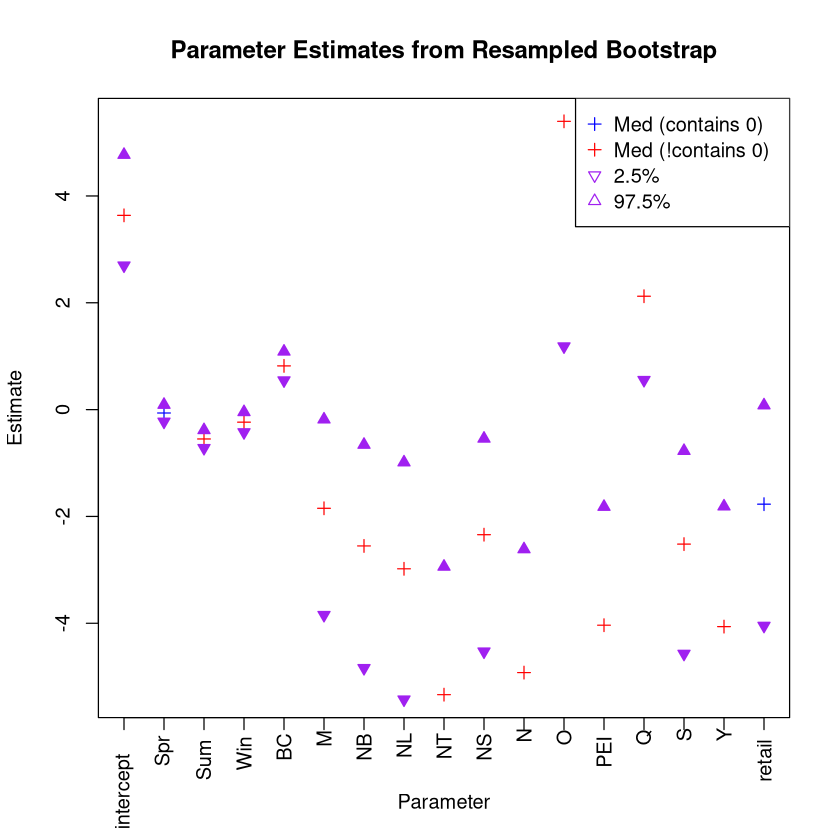

In [32]:
# Plot the median
palette(c("red", "blue"))
plot(R_results$`50%`, pch=3, type = "p", col = R_results$col, xlab = "Parameter", ylab = "Estimate", main = "Parameter Estimates from Resampled Bootstrap", xaxt = "n")

# Add custom x-axis with row names as labels
axis(1, at = 1:nrow(R_results), labels = FALSE)
text(1:nrow(R_results), par("usr")[3] - 0.1, srt = 90, adj = 1.4, labels = rownames(R_results), xpd = TRUE)

# Add 2.5% and 97.5% rows with triangles
points(R_results$`2.5%`, type = "p", pch = 25, bg="purple", col="purple") # Downward triangle for 2.5%
points(R_results$`97.5%`, type = "p", pch = 24, bg="purple", col="purple") # Upward triangle for 97.5%

# Add a legend
legend("topright", legend = c("Med (contains 0)", "Med (!contains 0)", "2.5%", "97.5%"),
    col = c("blue", "red", "purple", "purple"), pch = c(3, 3, 25, 24), lty = 0)

## Parametric Bootstrap

In [33]:
P_data <- split_data$P

In [34]:
alpha = 0.05

P_mean_and_sd <- apply(X=P_data[2:ncol(P_data)], MARGIN = 2, FUN = function(x) mean_and_sd(x))
P_intervals <- apply(X=P_data[2:ncol(P_data)], MARGIN = 2, FUN = function(x) interval(x, alpha))

P_results <- rbind(P_mean_and_sd,
                   P_intervals)

rownames(P_results)[1:2] <- c("mean", "sd")

P_results <- t(P_results)

contains <- sapply(1:nrow(P_results), function(i) {
    (P_results[i, "2.5%"] <= 0) & (P_results[i, "97.5%"] >= 0)
})

P_results <- as.data.frame(P_results)
P_results$contains <- contains

P_results$col <- ifelse(P_results$contains == TRUE, 2, 1)

P_results[, 1:ncol(P_results)-1]

,mean,sd,2.5%,50%,97.5%,contains
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
intercept,3.67940258,0.51126548,2.6773091,3.67511313,4.69077470,FALSE
Spr,-0.06532076,0.08374888,-0.2295456,-0.06519182,0.10043350,TRUE
Sum,-0.55194157,0.08688979,-0.7236796,-0.55074506,-0.38213582,FALSE
Win,-0.22869157,0.08965910,-0.4065933,-0.22995397,-0.05078027,FALSE
BC,0.81822871,0.16416765,0.5051385,0.81748162,1.14329057,FALSE
M,-1.91769183,0.92325906,-3.7485942,-1.90911200,-0.11100067,FALSE
NB,-2.63122463,1.04759939,-4.7203129,-2.62641109,-0.56624051,FALSE
NL,-3.07894069,1.11194691,-5.3064835,-3.06323557,-0.88791718,FALSE
NT,-5.40678126,1.27490062,-7.9180310,-5.39421497,-2.91237127,FALSE


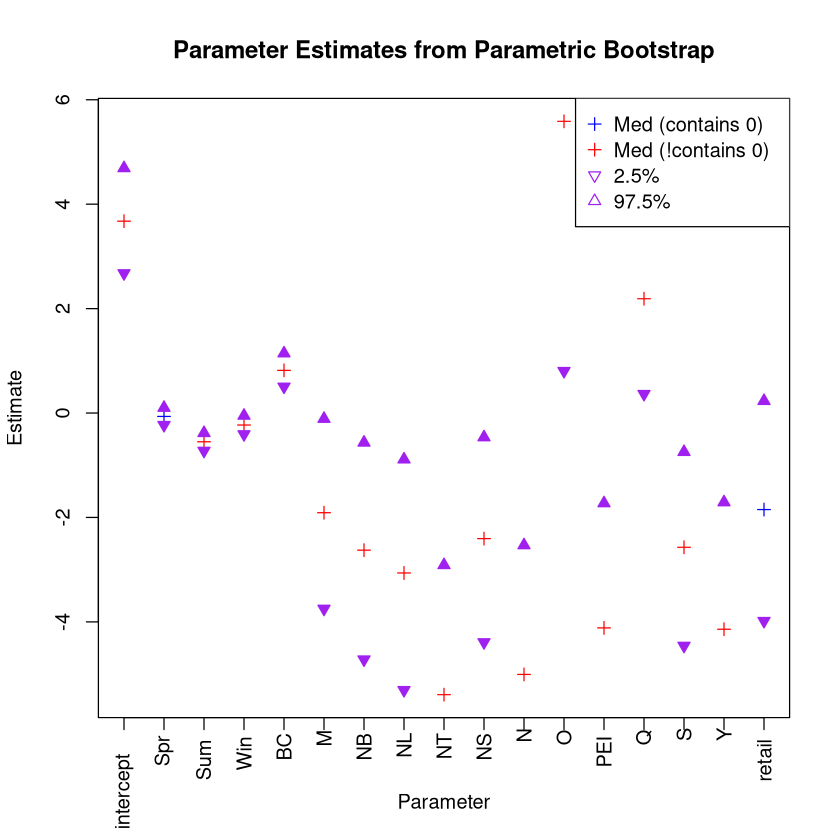

In [35]:
# Plot the median
palette(c("red", "blue"))
plot(P_results$`50%`, pch=3, type = "p", col = P_results$col, xlab = "Parameter", ylab = "Estimate", main = "Parameter Estimates from Parametric Bootstrap", xaxt = "n")

# Add custom x-axis with row names as labels
axis(1, at = 1:nrow(P_results), labels = FALSE)
text(1:nrow(P_results), par("usr")[3] - 0.1, srt = 90, adj = 1.4, labels = rownames(P_results), xpd = TRUE)

# Add 2.5% and 97.5% rows with triangles
points(P_results$`2.5%`, type = "p", pch = 25, bg="purple", col="purple") # Downward triangle for 2.5%
points(P_results$`97.5%`, type = "p", pch = 24, bg="purple", col="purple") # Upward triangle for 97.5%

# Add a legend
legend("topright", legend = c("Med (contains 0)", "Med (!contains 0)", "2.5%", "97.5%"),
    col = c("blue", "red", "purple", "purple"), pch = c(3, 3, 25, 24), lty = 0)

## Smooth Bootstrap

In [36]:
S_data <- split_data$S

In [37]:
alpha = 0.05

S_mean_and_sd <- apply(X=S_data[2:ncol(S_data)], MARGIN = 2, FUN = function(x) mean_and_sd(x))
S_intervals <- apply(X=S_data[2:ncol(S_data)], MARGIN = 2, FUN = function(x) interval(x, alpha))

S_results <- rbind(S_mean_and_sd,
                   S_intervals)

rownames(S_results)[1:2] <- c("mean", "sd")

S_results <- t(S_results)

contains <- sapply(1:nrow(S_results), function(i) {
    (S_results[i, "2.5%"] <= 0) & (S_results[i, "97.5%"] >= 0)
})

S_results <- as.data.frame(S_results)
S_results$contains <- contains

S_results$col <- ifelse(S_results$contains == TRUE, 2, 1)

S_results[, 1:ncol(S_results)-1]

,mean,sd,2.5%,50%,97.5%,contains
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
intercept,3.0032167,0.211839080,2.5785509,3.00613192,3.41745348,FALSE
Spr,-0.0432973,0.009423530,-0.0657243,-0.04139669,-0.02813229,FALSE
Sum,-0.5488623,0.006840469,-0.5649198,-0.54816059,-0.53537315,FALSE
Win,-0.1984346,0.011935837,-0.2268721,-0.19627501,-0.17925248,FALSE
BC,0.6665134,0.047726253,0.5721851,0.66546257,0.76338312,FALSE
M,-0.6717034,0.387893635,-1.4323908,-0.67648953,0.10359043,TRUE
NB,-1.2128494,0.440162662,-2.0806681,-1.21694261,-0.32875168,FALSE
NL,-1.5647129,0.468847487,-2.4853613,-1.57066552,-0.62292596,FALSE
NT,-3.6764259,0.524415788,-4.7039603,-3.68370460,-2.62777800,FALSE


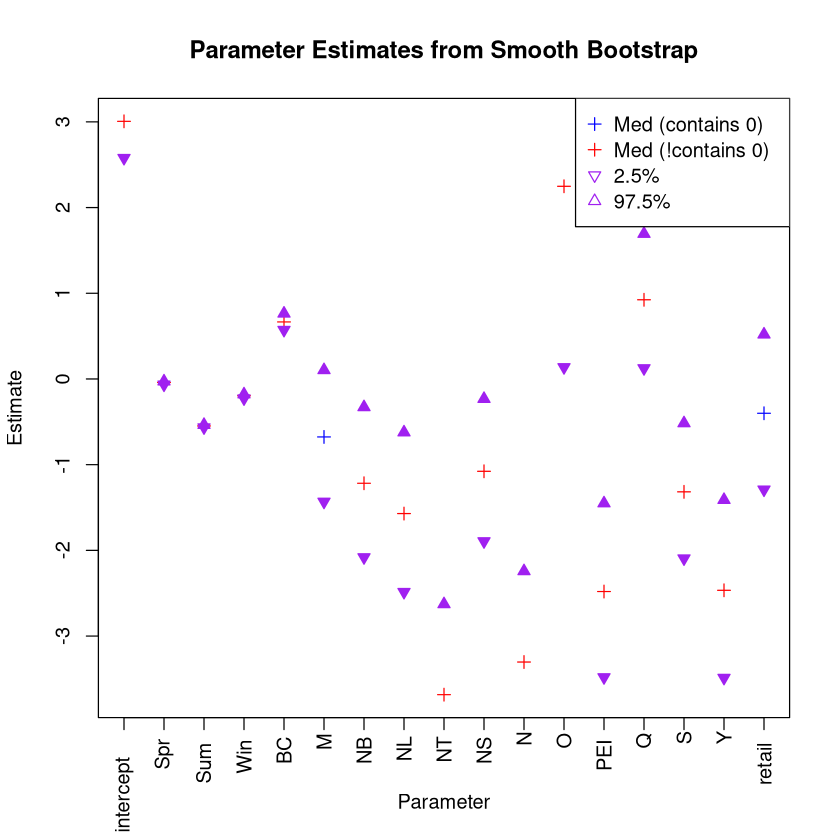

In [38]:
# Plot the median
palette(c("red", "blue"))
plot(S_results$`50%`, pch=3, type = "p", col = S_results$col, xlab = "Parameter", ylab = "Estimate", main = "Parameter Estimates from Smooth Bootstrap", xaxt = "n")

# Add custom x-axis with row names as labels
axis(1, at = 1:nrow(S_results), labels = FALSE)
text(1:nrow(S_results), par("usr")[3] - 0.1, srt = 90, adj = 1.4, labels = rownames(S_results), xpd = TRUE)

# Add 2.5% and 97.5% rows with triangles
points(S_results$`2.5%`, type = "p", pch = 25, bg="purple", col="purple") # Downward triangle for 2.5%
points(S_results$`97.5%`, type = "p", pch = 24, bg="purple", col="purple") # Upward triangle for 97.5%

# Add a legend
legend("topright", legend = c("Med (contains 0)", "Med (!contains 0)", "2.5%", "97.5%"),
    col = c("blue", "red", "purple", "purple"), pch = c(3, 3, 25, 24), lty = 0)